# 24 Spring CISC 488/688  Assignment 4 - Text Classification (Ham or Spam) and Language Identification

## Objective
This assignment is divided into two primary tasks:

The first task is centered on text classification of ham/spam messages. You will be provided with example code that utilizes the Bag of Words feature along with logistic regression modeling. Your objective is to select your own feature(s) for logistic regression, implement the model, and report on the classification accuracy.

The second task involves language identification using Naive Bayes, specifically through the analysis of unigrams and bigrams.

### Chapter 1: Text Classification for Ham/Spam Messages



Please start by updating related packages.

In [ ]:
! pip install numpy pandas scikit-learn

For this chapter, we will use the [ham/spam dataset](https://www.kaggle.com/datasets/matleonard/nlp-course?resource=download&select=spam.csv) available on Kaggle. The dataset has been downloaded and uploaded to Canvas under the name "spam.csv" for your convenience. Please start by dragging this CSV file into the root directory of your notebook folder.

Next, we will import the required libraries, load the dataset, and perform an initial visualization to better understand the data.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Before loading the dataset, drag spam.csv to the root
data = pd.read_csv('/content/spam.csv')
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."



Let's split the dataset into training and testing sets, allocating 80% for training and 20% for testing.

In [ ]:
texts = data['text']
labels = data['label']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

Below we will be using the Bag of Words feature to represent each document as a vector of term frequencies for each term in the vocabulary. We ignore the words that appear less than 4 times. Please [refer here](https://www.kaggle.com/code/matleonard/text-classification/notebook) for more information of this Bag of Words method.

In [ ]:
# Vectorizing the text using Bag of Words method
vectorizer = CountVectorizer(min_df=4)
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

Below is an example of using a logistic regression model. This model is trained on the Bag of Words representation of our training set, tested on the test set, and then we print out the resulting accuracy.

In [ ]:
# Training the Logistic Regression classifier
model = LogisticRegression()
model.fit(X_train_vectors, y_train)

# Predicting the test set results
y_pred = model.predict(X_test_vectors)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9775784753363229
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.98      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



### 📚 Task 1
For this task, you are required to select and utilize a different set (or sets) of features to train a logistic regression model for identifying ham/spam messages. You may use the provided code as a reference. You may consider exploring the following feature options:

1. **Length of the Message**: Spam messages often differ in length compared to non-spam messages. Include the length of each message as a numerical feature in your model.

2. **Number of Special Characters**: Spam messages may contain more special characters (e.g., $, %, !) than typical messages. Counting these characters could be a valuable feature.

3. **Presence of Specific Keywords**: Words like "free", "winner", "money", and "guarantee" are more prevalent in spam messages. Develop features that capture the presence or frequency of these keywords.

Feel free to explore additional features and utilize any resources, including AI tools like ChatGPT, to aid in completing this task. At the end of this notebook, report the accuracy of your model based on your chosen features.

In [ ]:
# # Write your code here
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report
# import re

# # Load the dataset
# # data = pd.read_csv('spam.csv', encoding='latin-1')

# # Feature Engineering
# # Length of the Message
# data['message_length'] = data['text'].apply(lambda x: len(x))

# # Number of Special Characters
# data['special_chars_count'] = data['text'].apply(lambda x: len(re.findall(r'[^\w\s]', x)))

# # Presence of Specific Keywords
# keywords = ['free', 'winner', 'money', 'guarantee']
# for keyword in keywords:
#     data[keyword] = data['text'].apply(lambda x: 1 if keyword in x.lower() else 0)

# vectorizer = CountVectorizer(min_df=4)
# data['vector'] = vectorizer.fit_transform(data['text'])

# # Selecting features and labels
# X = data[['vector', 'message_length', 'special_chars_count'] + keywords]
# y = data['label']

# # Splitting the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Training the Logistic Regression classifier
# model = LogisticRegression()
# model.fit(X_train, y_train)

# # Predicting the test set results
# y_pred = model.predict(X_test)

# # Evaluating the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
# print("Classification Report:\n", classification_report(y_test, y_pred))


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import re

# Load the dataset
# data = pd.read_csv('spam.csv', encoding='latin-1')

# Feature Engineering
# Length of the Message
data['message_length'] = data['text'].apply(lambda x: len(x))

# Number of Special Characters
data['special_chars_count'] = data['text'].apply(lambda x: len(re.findall(r'[^\w\s]', x)))

# Presence of Specific Keywords
keywords = ['free', 'winner', 'money', 'guarantee']
for keyword in keywords:
    data[keyword] = data['text'].apply(lambda x: 1 if keyword in x.lower() else 0)

# Selecting features and labels
X_text = data['text']
X_other_features = data[['message_length', 'special_chars_count'] + keywords]
y = data['label']

# Splitting the dataset into training and testing sets
X_text_train, X_text_test, X_other_train, X_other_test, y_train, y_test = train_test_split(X_text, X_other_features, y, test_size=0.2, random_state=42)

# Vectorizing the text using Bag of Words method
vectorizer = CountVectorizer(min_df=4)
X_text_train_vectors = vectorizer.fit_transform(X_text_train)
X_text_test_vectors = vectorizer.transform(X_text_test)

# Combining Bag of Words representation with other features
import scipy.sparse as sp
import numpy as np

X_train = sp.hstack((X_text_train_vectors, sp.csr_matrix(X_other_train.values)), format='csr')
X_test = sp.hstack((X_text_test_vectors, sp.csr_matrix(X_other_test.values)), format='csr')

# Training the Logistic Regression classifier
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9811659192825112
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.98      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Chapter 2: Language Identification



The second task involves language identification using Naive Bayes, specifically through the analysis of unigrams and bigrams. We will be using [this dataset from kaggle](https://www.kaggle.com/code/sadikaljarif/language-identification/input). The dataset has 21859 sentences classified in 22 unique languages. Similar to "spam.csv", the dataset has been downloaded and uploaded to Canvas under the name "lid.csv" for your convenience. Please start by dragging this CSV file into the root directory of your notebook folder.

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/lid.csv')
data.columns = ['Text', 'language']
data.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


### 📚 Task 2

Next, we need to add start and end markers to each text. Refer to [this post](https://linguistics.stackexchange.com/questions/11531/whats-the-real-need-for-an-end-symbol-in-n-gram-models) about its significance. I've provided an example in comment. Please provide your own markers or just uncomment the example to provide the markers.

In [ ]:
# Example of adding start and end markers to each text
data['Text'] = '<s>' + data['Text'] + '</s>'

# # Function to add start and end markers to each text
# def add_markers(text):
#     start_marker = '<s>'
#     end_marker = '</s>'
#     return start_marker + ' ' + text + ' ' + end_marker

# # Apply the function to each text in the dataset
# data['Text'] = data['Text'].apply(add_markers)

# Display the first few rows of the modified dataset
data.head()

,Text,language
0,<s>klement gottwaldi surnukeha palsameeriti ni...,Estonian
1,<s>sebes joseph pereira thomas på eng the jes...,Swedish
2,<s>ถนนเจริญกรุง อักษรโรมัน thanon charoen krun...,Thai
3,<s>விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்...,Tamil
4,<s>de spons behoort tot het geslacht haliclona...,Dutch


Next, we will convert the text documents into a matrix of token counts. `ngram_range=(1, 2)` specifies that the vectorizer should consider both unigrams (single words) and bigrams (pairs of consecutive words) when creating the matrix of token counts. This allows the model to not only learn the importance of individual words but also the contextual relationship between pairs of words.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with unigram and bigram
vectorizer = CountVectorizer(ngram_range=(1, 2), min_df=3)

# Fit and transform the data
X = vectorizer.fit_transform(data['Text'])
y = data['language']

Next, we initializes and trains a Multinomial Naive Bayes classifier with Laplace smoothing to predict languages. It splits the dataset into training and testing sets, trains the model on the training data, and then makes predictions on the test data.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
model = MultinomialNB(alpha=1.0)  # Using Laplace smoothing

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


Finally, it calculates and visualizes a confusion matrix using seaborn to show the accuracy of predictions against the true labels, helping to visually assess the model's performance across different languages.

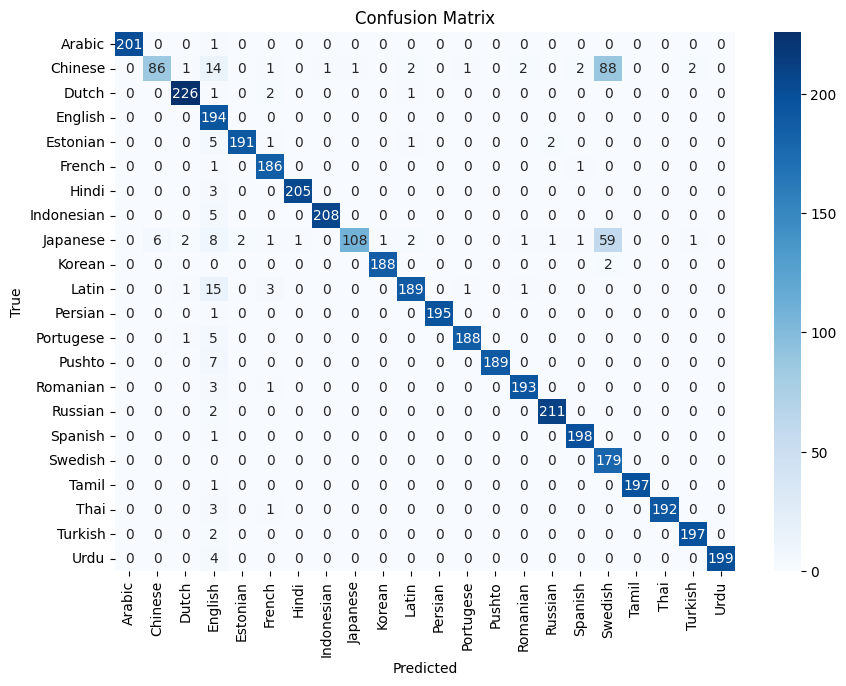

Accuracy: 0.9363636363636364


In [ ]:
# Define the order of labels if known
languages = sorted(data['language'].unique())  # Adjust based on how languages are represented

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=languages)

# Plotting the confusion matrix with language labels
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=languages, yticklabels=languages)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Questions

Double-click on this cell to enter your answers below each question.

**Text Classification**

1. Which new feature(s) did you implement for the ham/spam classification using logistic regression?

I implemented three new features for the ham/spam classification using logistic regression:

    Length of the Message

    Number of Special Characters

    Presence of Specific Keywords

2. What was the accuracy of your model? Was it an improvement over the bag of words method?

The accuracy of the model is 0.9811659192825112. Yes, it is an improvement over the bag of words method(from 0.9775784753363229 to 0.9811659192825112).

**Language Identification**

3. Was the inclusion of start and end markers beneficial in this task? Please provide your reasoning.

Yes, the inclusion of start and end markers in this task is beneficial. It helps in the identification of the boundaries of individual sentences, sentence segmentation and Handling Short Texts which are important in this task.

4. We implemented Laplace smoothing in our Naive Bayes model. Did you find it useful? If not, in what scenarios do you think it might be beneficial?

Yes it is useful. It helps in Avoiding Zero Probabilities, Handling Unseen Words, Regularization.

Laplace smoothing is beneficial in the scenarios where we have to avoid ZERO Probability or need regularization.


## Rubic

Question 1 - 60 (including code)

Question 2 - 20

Question 3 - 10

Question 4 - 10

Max points 100


## Submission

Ensure that your Colab notebook, with all cells executed and results visible, is downloaded in .ipynb format. Rename the downloaded file to include your name. Submit this notebook file via Canvas, and include a shareable link to the notebook stored in your Google Drive as comment. Both the submitted notebook content and the online version will undergo an initial comparison, after which, your online version will be re-executed to verify the consistency of the results.

Email chenhang@udel.edu for questions. Have fun exploring text classification and language identification!
